In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import time
import numpy as np
import pandas as pd

from os import listdir
from io import BytesIO
import requests

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,utils
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from scipy import stats
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import PIL
from PIL import Image

import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [4]:
DATA_DIR = 'data/caps_and_shoes_squared/'
IMAGE_SIZE = (28,28)
CLASS_LIST = ['cap','shoes']
BATCH_SIZE = 32

train_path = DATA_DIR + 'train'
validation_path = DATA_DIR + 'val'
test_path = DATA_DIR + 'test'

In [18]:
def plot_images(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        
        plt.imshow(ims[i].reshape(28,28), cmap="gray")

In [44]:
test_img_generator = ImageDataGenerator( rescale = 1./255)
img_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')
train_validation_img_generator = ImageDataGenerator(validation_split=0.2, rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')

train_partial_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='training')

train_validation_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='validation')

train_full_batches = img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)

validation_batches = img_generator.flow_from_directory(validation_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)
test_batches = test_img_generator.flow_from_directory(test_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical',batch_size=1, shuffle=False)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.
Found 2289 images belonging to 2 classes.
Found 670 images belonging to 2 classes.
Found 326 images belonging to 2 classes.


In [45]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=36, min_delta=0.001, restore_best_weights = True)

In [46]:
def define_model_architecture_64_32_16():
    model = models.Sequential()
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [47]:
model = define_model_architecture_64_32_16()
history = model.fit_generator(generator = train_partial_batches, steps_per_epoch=train_partial_batches.samples/BATCH_SIZE, 
                              validation_data = train_validation_batches, validation_steps = train_validation_batches.samples/BATCH_SIZE, 
                              epochs=200, verbose=2, workers=4, callbacks = [es_callback])

Epoch 1/200
58/57 - 6s - loss: 0.6917 - accuracy: 0.5671 - val_loss: 0.7065 - val_accuracy: 0.5864
Epoch 2/200
58/57 - 6s - loss: 0.6506 - accuracy: 0.6255 - val_loss: 0.6997 - val_accuracy: 0.6018
Epoch 3/200
58/57 - 6s - loss: 0.6418 - accuracy: 0.6376 - val_loss: 0.6795 - val_accuracy: 0.6324
Epoch 4/200
58/57 - 6s - loss: 0.6185 - accuracy: 0.6681 - val_loss: 0.6493 - val_accuracy: 0.6499
Epoch 5/200
58/57 - 6s - loss: 0.6156 - accuracy: 0.6621 - val_loss: 0.6441 - val_accuracy: 0.6499
Epoch 6/200
58/57 - 6s - loss: 0.6153 - accuracy: 0.6627 - val_loss: 0.6636 - val_accuracy: 0.6543
Epoch 7/200
58/57 - 6s - loss: 0.6023 - accuracy: 0.6725 - val_loss: 0.6415 - val_accuracy: 0.6543
Epoch 8/200
58/57 - 6s - loss: 0.6118 - accuracy: 0.6588 - val_loss: 0.6140 - val_accuracy: 0.6783
Epoch 9/200
58/57 - 6s - loss: 0.5917 - accuracy: 0.6878 - val_loss: 0.6247 - val_accuracy: 0.6849
Epoch 10/200
58/57 - 6s - loss: 0.5905 - accuracy: 0.6850 - val_loss: 0.6336 - val_accuracy: 0.6718
Epoch 11/

Epoch 83/200
58/57 - 6s - loss: 0.4497 - accuracy: 0.7877 - val_loss: 0.4844 - val_accuracy: 0.7768
Epoch 84/200
58/57 - 6s - loss: 0.4721 - accuracy: 0.7691 - val_loss: 0.5183 - val_accuracy: 0.7659
Epoch 85/200
58/57 - 6s - loss: 0.4702 - accuracy: 0.7789 - val_loss: 0.4765 - val_accuracy: 0.7943
Epoch 86/200
58/57 - 6s - loss: 0.4687 - accuracy: 0.7871 - val_loss: 0.4903 - val_accuracy: 0.7768
Epoch 87/200
58/57 - 6s - loss: 0.4511 - accuracy: 0.7855 - val_loss: 0.5569 - val_accuracy: 0.7374
Epoch 88/200
58/57 - 6s - loss: 0.4587 - accuracy: 0.7926 - val_loss: 0.4881 - val_accuracy: 0.8009
Epoch 89/200
58/57 - 6s - loss: 0.4622 - accuracy: 0.7871 - val_loss: 0.4810 - val_accuracy: 0.7812
Epoch 90/200
58/57 - 6s - loss: 0.4459 - accuracy: 0.8019 - val_loss: 0.4862 - val_accuracy: 0.7834
Epoch 91/200
58/57 - 6s - loss: 0.4417 - accuracy: 0.7997 - val_loss: 0.4819 - val_accuracy: 0.8074
Epoch 92/200
58/57 - 6s - loss: 0.4489 - accuracy: 0.8019 - val_loss: 0.4506 - val_accuracy: 0.7812


In [49]:
test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

Test loss: 0.4435 accuracy: 0.8282


In [50]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, min_delta=0.005, 
                            baseline=test_accuracy, restore_best_weights = True)

In [54]:
model.fit_generator(generator = train_full_batches, steps_per_epoch=train_full_batches.samples/BATCH_SIZE, 
                              validation_data = validation_batches, validation_steps = validation_batches.samples/BATCH_SIZE, 
                              epochs=100, verbose=2, workers=4)

Epoch 1/100
72/71 - 8s - loss: 0.4001 - accuracy: 0.8213 - val_loss: 0.3985 - val_accuracy: 0.8134
Epoch 2/100
72/71 - 7s - loss: 0.4044 - accuracy: 0.8187 - val_loss: 0.3801 - val_accuracy: 0.8343
Epoch 3/100


KeyboardInterrupt: 

In [55]:
test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

Test loss: 0.3546 accuracy: 0.8528


In [56]:
test_batches.reset()
actual_labels = []
X_test = []
i = 0
max_iter = test_batches.samples
for data, label in test_batches:
    actual_labels.append(label)
    X_test.append(data)
    i += 1
    if i == max_iter:
        break
        
actual_labels = np.concatenate(actual_labels)
X_test = np.concatenate(X_test)

In [57]:
test_batches.reset()
predictions = model.predict_generator(test_batches)

In [58]:
test_prediction_data = pd.DataFrame(np.hstack([predictions,actual_labels]).astype("float16"), columns=['predicted_cap','predicted_shoes','actual cap','actual_shoes'])
test_prediction_data[:5]

,predicted_cap,predicted_shoes,actual cap,actual_shoes
0,0.992676,0.007492,1.0,0.0
1,0.993164,0.006798,1.0,0.0
2,0.963379,0.036499,1.0,0.0
3,0.924805,0.074951,1.0,0.0
4,0.434326,0.565918,1.0,0.0


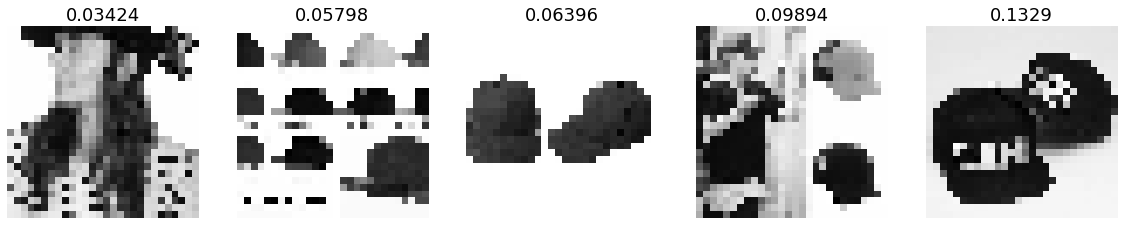

In [59]:
top_wrong_caps_ix = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values().index.values[:5]
top_wrong_caps_values = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values().values[:5]
plot_images(X_test[top_wrong_caps_ix],titles=top_wrong_caps_values)

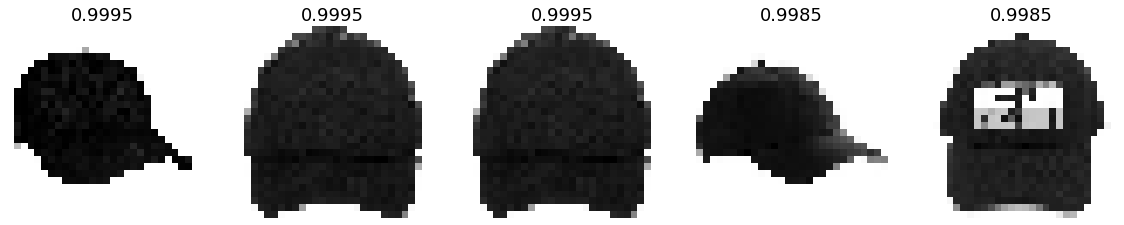

In [60]:
top_correct_caps_ix = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values(ascending=False).index.values[:5]
top_correct_caps_values = test_prediction_data[test_prediction_data['actual cap'] == 1]['predicted_cap'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_caps_ix],titles=top_correct_caps_values)

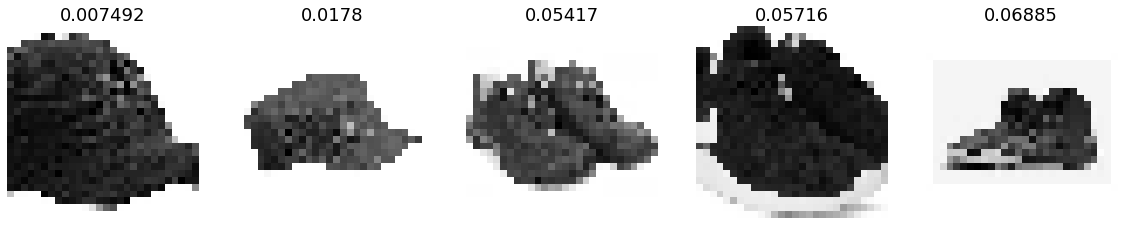

In [61]:
top_wrong_shoes_ix = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values().index.values[:5]
top_wrong_shoes_values = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values().values[:5]
plot_images(X_test[top_wrong_shoes_ix],titles=top_wrong_shoes_values)

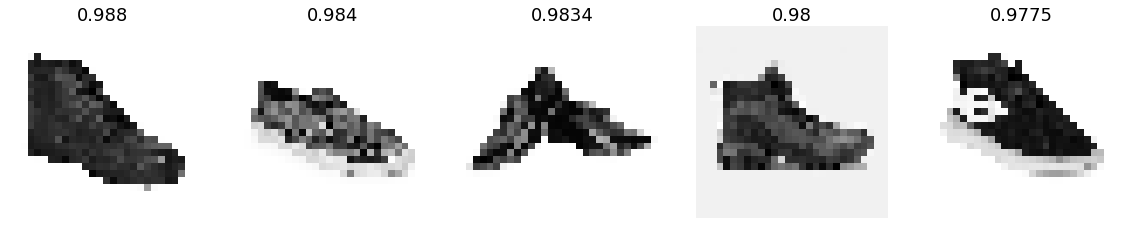

In [62]:
top_correct_shoes_ix = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values(ascending=False).index.values[:5]
top_correct_shoes_values = test_prediction_data[test_prediction_data['actual_shoes'] == 1]['predicted_shoes'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_shoes_ix],titles=top_correct_shoes_values)

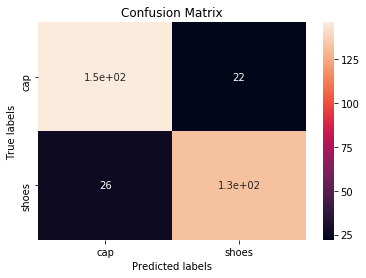

In [63]:
labels = ['cap','shoes']
cm = confusion_matrix(np.argmax(actual_labels ,axis=1), np.argmax(predictions, axis=1), [0,1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

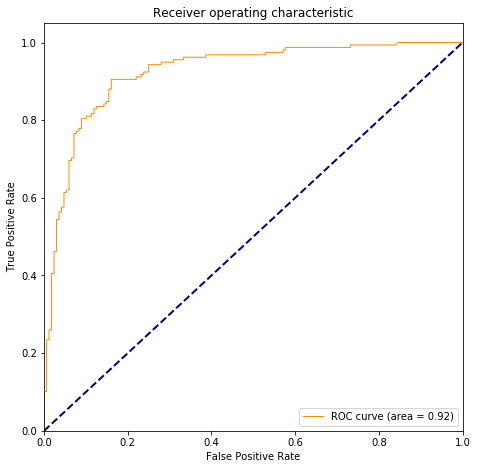

In [64]:
fpr, tpr, thresholds = roc_curve(actual_labels[:,1], predictions[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7.5, 7.5))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()